In [16]:
from metaflow import Flow, Step, Run

def list_all_vars_in_step(flow, step, run=None):
    """
    Lists all Metaflow artifacts in a particular flow in a particular step.

    Parameters:
    flow (String): Name of flow
    step (String): Name of step
    run (String): Number of run. Omit if you want the latest

    Returns:
    List of all artifacts stored in the step
    """

    # Get the specified flow
    flow_obj = Flow(flow)
    
    # If run is not specified, get the latest run
    if run is None:
        run_obj = flow_obj.latest_run
    else:
        run_obj = Run(f'{flow}/{run}')
    
    # Get the specified step
    step_obj = run_obj[step]
    
    # List all artifacts in the step
    artifacts = [artifact.name for artifact in step_obj.artifacts]

    print(artifacts)
    

In [22]:
latest_run = Flow('main_flow').latest_run
step = latest_run['train_model']
sample_train = step.task.data.sample_train
data = sample_train[0].numpy()
one_image = data[0,:,:,:]
print(one_image)
print(type(one_image))
print(one_image.shape)

KeyError: 'sample_train'

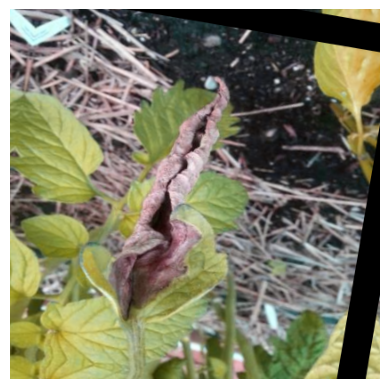

In [18]:
import matplotlib.pyplot as plt

one_image_normalized = one_image / 255.0

# Display the image using matplotlib
plt.imshow(one_image_normalized)
plt.axis('off')  # Hide the axes
plt.show()

In [20]:
latest_run = Flow('main_flow').latest_run
step = latest_run['augment_data']
url = step.task.data.augmented_train_url
print(url)

s3://metaflow-metaflows3bucket-hnioinnnzvtv/data/main_flow/21/augmented_train.tar.gz
